In [1]:
import numpy as np
import matplotlib.pyplot as plt

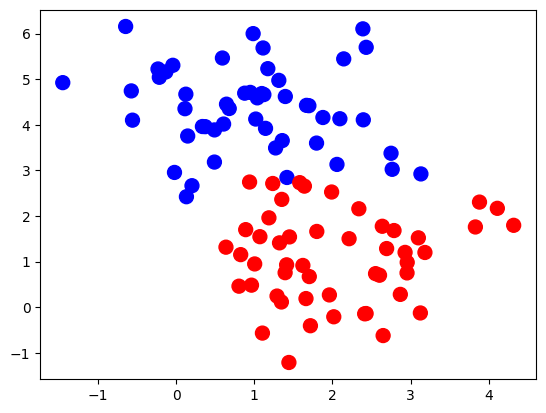

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [3]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Create the SVC model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [5]:
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
param_grid

{'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}

In [6]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(model, param_grid, verbose=3)

In [7]:
# Fit the model by using the grid search classifier.
# This will take the SVC model and try each combination of parameters.
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=1, gamma=0.0001;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.867 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.0001;, score=0.800 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.933 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.0001;, score=1.000 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.0005;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.0005;, score=0.867 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.0005;, score=0.800 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.0005;, score=0.933 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.0005;, score=1.000 total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.001;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.001;

,estimator,SVC(kernel='linear')
,param_grid,"{'C': [1, 5, ...], 'gamma': [0.0001, 0.0005, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,5


In [8]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

{'C': 5, 'gamma': 0.0001}


In [9]:
# List the best score
print(grid_clf.best_score_)

0.9333333333333333


In [10]:
# Make predictions with the hypertuned model
predictions = grid_clf.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0])

In [11]:
# Score the hypertuned model on the test dataset
grid_clf.score(X_test, y_test)

0.92

# RandomizedSearchCV

In [12]:
big_param_grid = {
    'C' : np.arange(0, 100, 1),
    'gamma': np.arange(0, 0.01, .0001),
}
big_param_grid

{'C': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 'gamma': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
        0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
        0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
        0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
        0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
        0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
        0.0048, 0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055,
        0.0056, 0.0057, 0.0058, 

In [13]:
# Create the randomized search estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import RandomizedSearchCV
random_clf = RandomizedSearchCV(model, big_param_grid, n_iter=100, random_state=1, verbose=3)
random_clf

,estimator,SVC(kernel='linear')
,param_distributions,"{'C': array([ 0, 1..., 97, 98, 99]), 'gamma': array([0. ...0098, 0.0099])}"
,n_iter,100
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,1
,error_score,nan


In [14]:
# Fit the model by using the randomized search estimator.
# This will take the Logistic Regression model and try a random sample of combinations of parameters.
random_clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................C=2, gamma=0.0035;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=2, gamma=0.0035;, score=0.867 total time=   0.0s
[CV 3/5] END .................C=2, gamma=0.0035;, score=0.800 total time=   0.0s
[CV 4/5] END .................C=2, gamma=0.0035;, score=0.933 total time=   0.0s
[CV 5/5] END .................C=2, gamma=0.0035;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=51, gamma=0.0092;, score=1.000 total time=   0.0s
[CV 2/5] END ................C=51, gamma=0.0092;, score=0.800 total time=   0.0s
[CV 3/5] END ................C=51, gamma=0.0092;, score=0.867 total time=   0.0s
[CV 4/5] END ................C=51, gamma=0.0092;, score=0.933 total time=   0.0s
[CV 5/5] END ................C=51, gamma=0.0092;, score=1.000 total time=   0.0s
[CV 1/5] END .................C=9, gamma=0.0005;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=9, gamma=0.000

/Users/tarekatwan/Repos/MyWork/Teach/repos/adv_ml_ds/dev1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tarekatwan/Repos/MyWork/Teach/repos/adv_ml_ds/dev1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tarekatwan/Repos/MyWork/Teach/repos/adv_ml_ds/dev1/lib/python3.12/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/Users/tarekatwan/Repos/MyWork/Teach/repos/ad

,estimator,SVC(kernel='linear')
,param_distributions,"{'C': array([ 0, 1..., 97, 98, 99]), 'gamma': array([0. ...0098, 0.0099])}"
,n_iter,100
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,1
,error_score,nan


In [15]:
# List the best parameters for this dataset
print(random_clf.best_params_)

{'gamma': np.float64(0.0005), 'C': np.int64(9)}


In [16]:
# List the best score
print(random_clf.best_score_)

0.9333333333333333


In [17]:
# Make predictions with the hypertuned model
predictions = random_clf.predict(X_test)

In [18]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.83      1.00      0.91        10
         red       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

